In [1]:
import pandas as pd
df = pd.read_csv('ten-year-scrape.csv', encoding= 'unicode_escape')
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace("-", "_")
df.columns = df.columns.str.lower()
pd.set_option('display.max_columns', None)

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df.head(3)

,bill_number,bill_link,bill_description,bill_date,bill_section,bill_sponsor,sponsor_party,sponsor_name,bill_year,trimmed_bill_section
0,S7728,https://www.nysenate.gov/legislation/bills/201...,Establishes a beer production tax credit for b...,7/18/12,Tax,ZELDIN,Republican,Lee Zeldin,2012.0,Tax
1,S6193,https://www.nysenate.gov/legislation/bills/201...,"Authorizes assessor of the town of Islip, coun...",7/18/12,Property Tax,ZELDIN,Republican,Lee Zeldin,2012.0,Property Tax
2,S7131,https://www.nysenate.gov/legislation/bills/201...,Relates to limiting base proportion for the 20...,6/29/12,Property Tax,ZELDIN,Republican,Lee Zeldin,2012.0,Property Tax


In [3]:
df.trimmed_bill_section.nunique()

187

In [4]:
df.dtypes

bill_number              object
bill_link                object
bill_description         object
bill_date                object
bill_section             object
bill_sponsor             object
sponsor_party            object
sponsor_name             object
bill_year               float64
trimmed_bill_section     object
dtype: object

Tax                           446
Property Tax                  314
Environmental Conservation    281
Public Health                 266
Education                     257
Name: bill_section, dtype: int64

In [7]:
df.trimmed_bill_section.value_counts().head(5)

Tax                           446
Property Tax                  314
Environmental Conservation    281
Public Health                 266
Education                     257
Name: trimmed_bill_section, dtype: int64

<AxesSubplot:>

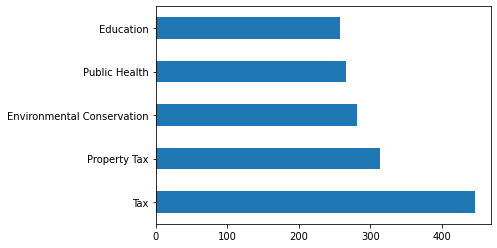

In [8]:
df.trimmed_bill_section.value_counts().head(5).plot(kind='barh')

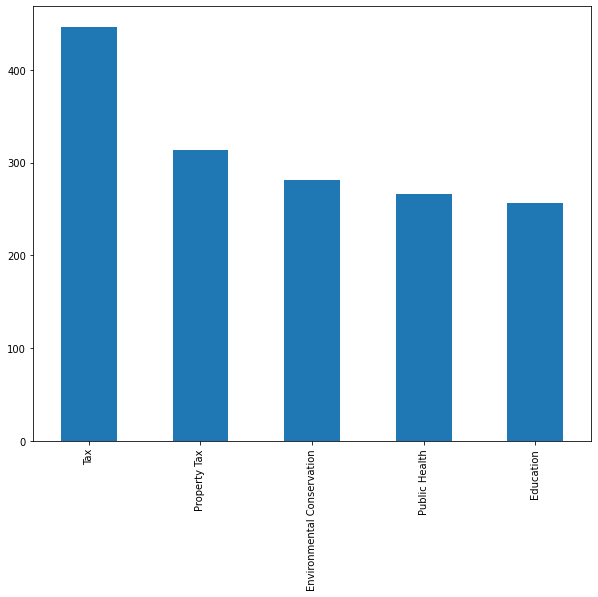

In [13]:
from matplotlib import pyplot as plt
df.trimmed_bill_section.value_counts().head(5).plot(figsize=(10,8), kind='bar')
plt.savefig('top_5.svg')

In [15]:
df.trimmed_bill_section.value_counts().head(10)

Tax                               446
Property Tax                      314
Environmental Conservation        281
Public Health                     266
Education                         257
Executive                         219
Retirement and Social Security    173
Public Authorities                150
Insurance                         118
Social Services                   114
Name: trimmed_bill_section, dtype: int64

In [16]:
df.groupby(by='sponsor_party').bill_section.count()

sponsor_party
Democrat              3339
Independence Party      55
Independent              6
Republican            1538
Name: bill_section, dtype: int64

In [ ]:
df.groupby(by='sponsor_party').bill_section.count()

In [ ]:
df.query('sponsor_party == "Republican"').bill_section.value_counts().head(5)

In [ ]:
df.query('sponsor_party == "Democrat"').bill_section.value_counts().head(5)

In [ ]:
df.query('bill_section == "Military and veterans"').groupby(by='sponsor_party').count()

In [ ]:
df.query('bill_section == "Environmental Conservation"').groupby(by='sponsor_party').count()

In [ ]:
df.bill_section.value_counts()

In [ ]:
df.query('bill_section == "Public Health"').groupby(by='sponsor_party').count()

In [ ]:
df.sponsor_party.value_counts()

In [ ]:
df['bill_date'] = pd.to_datetime(df['bill_date'], errors='coerce')

In [ ]:
df.head(4)

In [ ]:
df.dtypes

In [ ]:
df['bill_year'] = df['bill_date'].dt.to_period('Y')

In [ ]:
df.head(10)

In [ ]:
df.groupby(['bill_year', 'bill_section']).head(5).plot(kind='barh')

In [ ]:
# df.groupby(by='bill_year').bill_section.count().plot(figsize=(10,8))

In [ ]:
# df.to_csv('ten-year-scrape.csv')

In [ ]:
df.groupby(by='bill_year').bill_section.count().plot(figsize=(10,8), kind='bar')

In [ ]:
df.bill_number.nunique()

In [ ]:
df.bill_year.nunique()

In [ ]:
df.bill_link.nunique()

In [ ]:
df.groupby(by='bill_year').bill_section.count()

In [ ]:
df.bill_section.value_counts().head(5)

In [ ]:
from matplotlib import pyplot as plt
df.bill_section.value_counts().head(5).plot(kind="bar", figsize=(10,8))
plt.savefig('top_5.svg')

In [ ]:
df.query('bill_section == "Tax"').sponsor_party.value_counts()

In [ ]:
df.query('bill_section == "Tax"').nunique()